# The gas-water shift reaction

Consider the gas-water shift reaction
\begin{align*}
{\rm 
CO(g) + H_2O(g) \leftrightarrows CO_2(g) + H_2(g)
}
\end{align*}

| gas       | $M_w$        | $H_f$         | $G_f$         |
| :--       | --:        | --:           | --:           |
|           | ${\rm g\,mol^{-1}}$ | ${\rm kJ\,mol^{-1}}$ | ${\rm kJ\,mol^{-1}}$ |
| CO(g)     | $28.01$    | $ -110.5$     | $ -137.2$     |
| CO$_2$(g) | $44.01$    | $ -393.3$     | $ -394.6$     |
| H$_2$(g)  | $ 2.02$    | $    0.0$     | $    0.0$     |
| H$_2$O(g) | $18.02$    | $ -241.8$     | $ -228.4$     |
|           |            |               |               |


The data in the table have been summarized in the dictionary `data`.  The stoichiometric coefficients (the stoichiometric coefficient for species $k$ is typically denoted by the symbol $\nu_k$) of the reaction are held in the dictionary `nu`.  Note that product species have a positive stoichiometric coefficient, and reactant species have a negative stoichiometric coefficient.

In [2]:
R = 8.314e-3  # ideal gas constant / kJ mol^{-1} K^{-1}
T0 = 298.15   # reference temperature / K
p0 = 1.0e5    # reference pressure / Pa


# Data about the gases: 
#  Mw - molecular weight g/mol
#  Hf - heat of formation 
#  Gf - Gibbs free energy 
data = {}
data['CO']  = {'Mw':28.01, 'Hf':-110.5, 'Gf':-137.2 }
data['CO2'] = {'Mw':44.01, 'Hf':-393.3, 'Gf':-394.6 }
data['H2']  = {'Mw': 2.02, 'Hf':   0.0, 'Gf':   0.0 }
data['H2O'] = {'Mw':18.02, 'Hf':-241.8, 'Gf':-228.4 }


# stoichiometric coefficients
nu = {} 
nu['CO']  = -1.0
nu['CO2'] =  1.0 
nu['H2']  =  1.0
nu['H2O'] = -1.0

## Part 1: Standard reaction enthalpy and Gibbs energy

The standard enthalpy of reaction $\Delta H_{\rm rxn}$ is defined by
\begin{align*}
\Delta H_{\rm rxn}
&= \sum_k \nu_k H_{f,k}
\end{align*}
where $H_{f,k}$ is the standard enthalpy of formation of species $k$.  The standard Gibbs energy of reaction $\Delta G_{\rm rxn}$ is given by
\begin{align*}
\Delta G_{\rm rxn}
&= \sum_k \nu_k G_{f,k}
\end{align*}
where $G_{f,k}$ is the standard enthalpy of formation of species $k$.

**Task:** Calculate the standard enthalpy of reaction and the standard Gibbs energy of reaction.

In [3]:
Hrxn = 0.0 # Heat of reaction
Grxn = 0.0 # Gibbs free energy of reaction
for gas, coeff in nu.items():
    Hrxn += coeff*data[gas]['Hf']
    Grxn += coeff*data[gas]['Gf']

print(f'standard enthalpy of reaction: {Hrxn} kJ mol^{{-1}}')    
print(f'standard Gibbs energy of reaction: {Grxn} kJ mol^{{-1}}')

standard enthalpy of reaction: -41.0 kJ mol^{-1}
standard Gibbs energy of reaction: -29.00000000000003 kJ mol^{-1}


## Part 2: Conversion between mole numbers and mole fractions

The mole fraction of species $k$, denoted by $x_k$, in a system is given by
\begin{align*}
x_k = \frac{N_k}{N}
\end{align*}
where $N_k$ is the number of moles of species $k$, and $N=\sum_j N_j$ is the total moles in the system.

**Task:** From the dictionary with the mole numbers as an input, create a dictionary of mole fractions.

In [7]:
# some test data - mole numbers of some gases
mole = {}
mole['CO']  = 1.0
mole['CO2'] = 1.0 
mole['H2']  = 1.0
mole['H2O'] = 1.0


total_moles = sum(mole.values())

x_dict = {}
for name, N in mole.items():
    x_dict[name] = N/total_moles


# output your answer
for name, x in x_dict.items():
    print(f'{name}: mole fraction = {x}')

def get_x(mole):
    x_dict = {}
    for name, N in mole.items():
        x_dict[name] = N/total_moles
    return x_dict


CO: mole fraction = 0.25
CO2: mole fraction = 0.25
H2: mole fraction = 0.25
H2O: mole fraction = 0.25


## Part 3: Heat capacity

The heat capacity of the gases can be described by the equation
\begin{align*}
\frac{C_p}{R}
&= a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4
\end{align*}
where $T$ is the absolute temperature in kelvin,
$R=8.314$\,J$^{-1}$\,mol\,K$^{-1}$ is the ideal gas constant, and the
coefficients $a_k$ are given in the table below.


| gas       | $a_0$   | $a_1\times10^3$ | $a_2\times10^5$ | $a_3\times10^8$ | $a_4\times10^{11}$ |
| :--       | --:     | --:             | --:             | --:             | --:                |
|           |         | ${\rm K^{-1}}$  | ${\rm K^{-2}}$    | ${\rm K^{-3}}$  |  ${\rm K^{-4}}$  |
| CO(g)     | $3.912$ | $ -3.913$| $1.182$  | $ -1.302$       | $  0.515$          |
| CO$_2$(g) | $3.259$ | $  1.356$| $1.502$  | $ -2.374$       | $  1.056$          |
| H$_2$(g)  | $2.883$ | $  3.681$| $-0.772$ | $  0.692$       | $ -0.213$          |
| H$_2$O(g) | $4.395$ | $ -4.186$| $1.405$ | $ -1.564$       | $  0.632$          |


The coefficients of the heat capacity have been added to the dictionary `data` (see below).  In what follows below, assume that the mixtures behave as an ideal gas.


In [6]:
data['CO'] ['Cp_coeff'] = [3.912, -3.913e-3,  1.182e-5, -1.302e-8,  0.515e-11]      
data['CO2']['Cp_coeff'] = [3.259,  1.356e-3,  1.502e-5, -2.374e-8,  1.056e-11]      
data['H2'] ['Cp_coeff'] = [2.883,  3.681e-3, -0.772e-5,  0.692e-8, -0.213e-11]      
data['H2O']['Cp_coeff'] = [4.395, -4.186e-3,  1.405e-5, -1.564e-8,  0.632e-11]

R = 8.314  # J mol^{-1} K^{-1}

import sympy as sp

Hf, Gf = sp.symbols('Hf  Gf')
Tf = 298.15
T0 = sp.symbols('T0')
R = sp.symbols('R')

T = sp.symbols('T')
t = T
a = []
Cp = 0
for i in range(5):
    var = sp.symbols(f'a_{i}')
    a.append(var)
    Cp += var*t**i
Cp *= R    
print(Cp)

H = sp.integrate(Cp, (T, T0, T)) + Hf
print(H)

G = Gf*T/Tf - T*sp.integrate(H/(T**2), (T, T0, T)) 
print(G)

get_Cp = sp.lambdify([T, a], Cp.subs({T0: Tf, R: 8.314}))
get_H = sp.lambdify([T, a, Hf], H.subs({T0: Tf, R: 8.314e-3}))
get_G = sp.lambdify([T, a, Hf, Gf], G.subs({T0: Tf, R: 8.314e-3}))

def get_Cp_mix(T, N_dict):
    tmp = 0.0
    for mol, N in N_dict.items():
        tmp += N * get_Cp(T, data[mol]['Cp_coeff'])
    return tmp

def get_H_mix(T, N_dict):
    tmp = 0.0
    for mol, N in N_dict.items():
        tmp += N * get_H(T, data[mol]['Cp_coeff'], data[mol]['Hf'])
    return tmp

def get_G_mix(T, N_dict):
    tmp = 0.0
    for mol, N in N_dict.items():
        tmp += N * get_G(T, data[mol]['Cp_coeff'], data[mol]['Hf'], data[mol]['Gf'])
    return tmp


R*(T**4*a_4 + T**3*a_3 + T**2*a_2 + T*a_1 + a_0)
Hf + R*T**5*a_4/5 + R*T**4*a_3/4 + R*T**3*a_2/3 + R*T**2*a_1/2 + R*T*a_0 - R*T0**5*a_4/5 - R*T0**4*a_3/4 - R*T0**3*a_2/3 - R*T0**2*a_1/2 - R*T0*a_0
0.00335401643468053*Gf*T - T*(R*T**4*a_4/20 + R*T**3*a_3/12 + R*T**2*a_2/6 + R*T*a_1/2 - R*T0**4*a_4/20 - R*T0**3*a_3/12 - R*T0**2*a_2/6 - R*T0*a_1/2 + R*a_0*log(T) - R*a_0*log(T0) - (-60*Hf + 12*R*T0**5*a_4 + 15*R*T0**4*a_3 + 20*R*T0**3*a_2 + 30*R*T0**2*a_1 + 60*R*T0*a_0)/(60*T0) + (-60*Hf + 12*R*T0**5*a_4 + 15*R*T0**4*a_3 + 20*R*T0**3*a_2 + 30*R*T0**2*a_1 + 60*R*T0*a_0)/(60*T))


**Task:**
Plot the molar heat capacity of the mixture and of each of the individual components as a function of temperature.

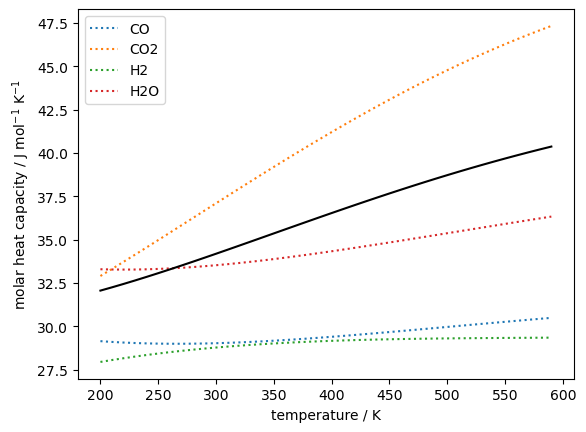

In [10]:
import numpy as np
import matplotlib.pylab as plt

moles = {'CO':1, 'CO2':2, 'H2':0, 'H2O':1}
T_data = np.arange(200.0, 600.0, 10.0)

x_dict = get_x(moles)
for mol in moles.keys():
    Cp_data = [get_Cp(T, data[mol]['Cp_coeff']) for T in T_data]
    plt.plot(T_data, Cp_data, ls='dotted', label=f'{mol}')

Cp_data = [get_Cp_mix(T, x_dict) for T in T_data]
plt.plot(T_data, Cp_data, color='black')

plt.legend()
plt.xlabel('temperature / K')
plt.ylabel(r'molar heat capacity / J mol$^{-1}$ K$^{-1}$')
plt.show()

**Task:**
Plot the heat capacity of reaction $\Delta C_{p,{\rm rxn}}(T)$ of the gas-water shift reaction as a function of temperature.

Note that the heat capacity of reaction is defined as
\begin{align*}
\Delta C_{p,{\rm rxn}}
&= \sum_k \nu_k C_{p,k}(T)
\end{align*}
where $T$ is the absolute temperature of the system, and $C_{p,k}(T)$ is the molar heat capacity of species $k$ at temperature $T$.

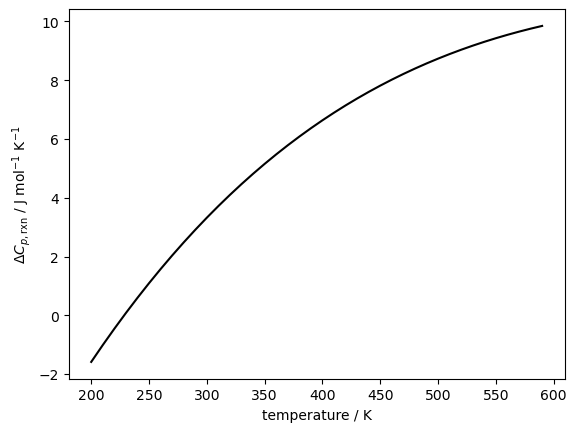

In [11]:
T_data = np.arange(200.0, 600.0, 10.0)

Cp_data = [get_Cp_mix(T, nu) for T in T_data]
plt.plot(T_data, Cp_data, color='black')


plt.xlabel('temperature / K')
plt.ylabel(r'$\Delta C_{p,{\rm rxn}}$ / J mol$^{-1}$ K$^{-1}$')
plt.show()

## Part 4: Enthalpy and Gibbs free energy

The enthalpy can be determined from the heat capacity:
\begin{align*}
H(T) &= H_f + \int_{T_f}^{T} dT' C_p(T')
\end{align*}

The Gibbs energy can be determined from the enthalpy:
\begin{align*}
\frac{G(T)}{RT}
%&= \frac{G_f}{RT_f}
%+ \int_{T_f}^{T} d\frac{1}{RT'} H(T')
%\\
&= \frac{G_f}{RT_f}
- \int_{T_f}^{T} dT'\, \frac{H(T')}{RT'^2} 
\end{align*}
where $T_f=298.15\,{\rm K}$.

**Task:** 
Plot the variation of the enthalpy of reaction and Gibbs free energy of reaction with temperature.

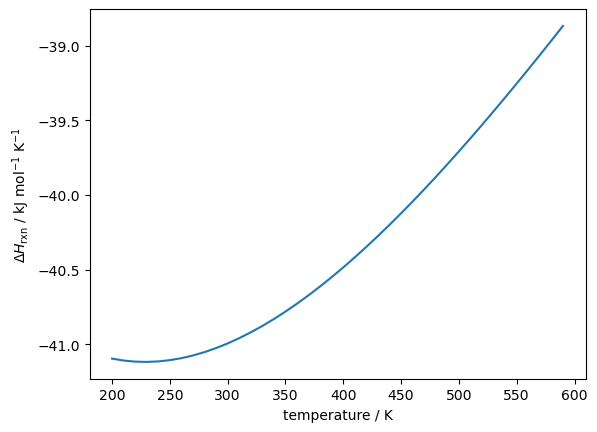

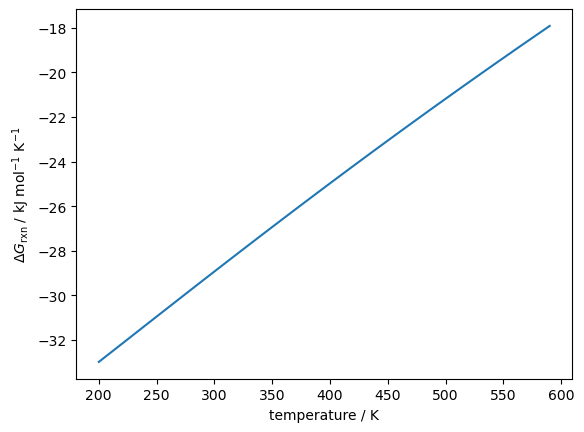

In [14]:
H_data = [get_H_mix(T, nu) for T in T_data]
plt.plot(T_data, H_data)
plt.xlabel('temperature / K')
plt.ylabel(r'$\Delta H_{\rm rxn}$ / kJ mol$^{-1}$ K$^{-1}$')
plt.show()

G_data = [get_G_mix(T, nu) for T in T_data]
plt.plot(T_data, G_data)
plt.xlabel('temperature / K')
plt.ylabel(r'$\Delta G_{\rm rxn}$ / kJ mol$^{-1}$ K$^{-1}$')
plt.show()


## Part 5: Chemical reaction equilibrium

The Gibbs free energy $G$ of an ideal gas mixture is given by:
\begin{align*}
G(T) &= \sum_k N_k [ G_{f,k}(T) + RT\ln y_k ]
\end{align*}
where $N_k$ is the number of moles of species $k$ in the mixture, and $y_k$ is the mole fraction of $k$ species $k$ in the mixture.

The extent of reaction $\xi$ quantifies how far a reaction has proceeded.  Positive values correspond to the reaction proceeding forward, while negative values correspond to the reaction proceeding backward.
The variation of the number of moles of species $k$ in the system with the extent of reaction is 
give by
\begin{align*}
N_k &= N_k^{(0)} + \nu_k \xi
\end{align*}
where $N_k^{(0)}$ is the initial number of moles of species $k$ in the system.
The equilibrium value of the extent of reaction minimizes the Gibbs free energy.

**Task:**
Write a code to determine variation of the equilibrium extent of reaction with temperature.  Note that you might want to use the `minimize` routine from `scipy.optimize` (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).



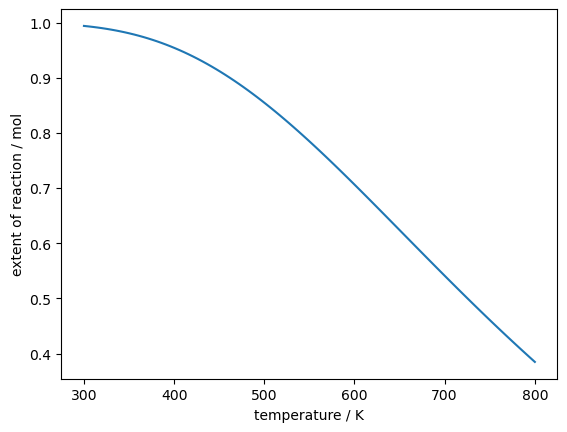

In [15]:
# some test data - mole numbers of some gases
from scipy.optimize import minimize

N0 = {}
N0['CO']  = 1.0
N0['CO2'] = 1.0 
N0['H2']  = 1.0
N0['H2O'] = 1.0

def G_opt(xi, T, N0_dict):
    R = 8.314e-3
    G = 0.0
    N_dict = {mol: N0+nu[mol]*xi  for mol, N0 in N0_dict.items()}
    Ntotal = sum(N_dict.values())
    y_dict = {mol: N/Ntotal  for mol, N in N_dict.items()}
    for mol, N in N_dict.items():
        G += N*(get_G(T, data[mol]['Cp_coeff'], data[mol]['Hf'], data[mol]['Gf']) + R*T*np.log(y_dict[mol]))
    return G

T = 400
xi0 = 0.999

#xi_list = np.linspace(0.01, 0.99, 100)
#G_list = [G_opt(xi, T, N0) for xi in xi_list]
#plt.plot(xi_list, G_list)
#plt.show()


T_list = np.linspace(300.0, 800.0, 100)
xi_list = []
for T in T_list:
    sol = minimize(G_opt, [xi0], args=(T, N0))
    xi = sol.x[0]
    xi_list.append(xi)
    xi0 = xi
plt.plot(T_list, xi_list)
plt.ylabel('extent of reaction / mol')
plt.xlabel('temperature / K')
plt.show()

